Imports

In [15]:
import pandas as pd
import regex as re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
import emoji
from random import randint
from googletrans import Translator, LANGUAGES

RAW_DATASET_PATH = './sk_dataset/raw_data.xlsx'

Dataset Operations 

In [2]:
df = pd.read_excel(RAW_DATASET_PATH)
df.head(10)

,"airline_sentiment,tweet_id,""tweet_created\t"",name,text",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"negative,1467810672,Mon Apr 06 22:19:49 PDT 20...",NaN,NaN,NaN,NaN
1,"negative,1467810917,Mon Apr 06 22:19:53 PDT 20...",NaN,NaN,NaN,NaN
2,"negative,1467811184,Mon Apr 06 22:19:57 PDT 20...",NaN,NaN,NaN,NaN
3,"negative,1467811193,Mon Apr 06 22:19:57 PDT 20...",NaN,NaN,NaN,NaN
4,"negative,1467811372,Mon Apr 06 22:20:00 PDT 20...",NaN,NaN,NaN,NaN
5,"negative,1467811592,Mon Apr 06 22:20:03 PDT 20...",NaN,NaN,NaN,NaN
6,"negative,1467811594,Mon Apr 06 22:20:03 PDT 20...",NaN,NaN,NaN,NaN
7,"negative,1467811795,Mon Apr 06 22:20:05 PDT 20...",NaN,NaN,NaN,NaN
8,"negative,1467812025,Mon Apr 06 22:20:09 PDT 20...",NaN,NaN,NaN,NaN
9,"negative,1467812416,Mon Apr 06 22:20:16 PDT 20...",NaN,NaN,NaN,NaN


In [3]:
# Convert unified data to a list and separate
df[['class', 'id', 'date', 'name', 'text']] = pd.DataFrame(df['airline_sentiment,tweet_id,"tweet_created\t",name,text'].str.split(',', n=4, expand=True), index=df.index)
df.drop(columns=['airline_sentiment,tweet_id,"tweet_created\t",name,text', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,class,id,date,name,text
0,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,Pánovi Bánovi veľmi chýba slušná výchova a reš...
1,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,Marek Kollar ..on je BUDAR
2,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,Peťo Vinci dosť nešťastne vyjadrenie.
3,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,Rony Iron a vy máte nešťastné rozmýšľanie. Ko...
4,negative,1467811372,Mon Apr 06 22:20:00 PDT 2009,Janka Koreňová áno a podporiť politiku eú asi ...,


In [4]:
# Remove useless features for raw dataset
df.drop(columns=['date', 'name'], inplace=True)
df.head()

,class,id,text
0,negative,1467810672,Pánovi Bánovi veľmi chýba slušná výchova a reš...
1,negative,1467810917,Marek Kollar ..on je BUDAR
2,negative,1467811184,Peťo Vinci dosť nešťastne vyjadrenie.
3,negative,1467811193,Rony Iron a vy máte nešťastné rozmýšľanie. Ko...
4,negative,1467811372,


In [6]:
#Remove emojis from texts 
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emojis (emoticons)
                               u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                               u"\U0001F700-\U0001F77F"  # Alphanumeric characters
                               u"\U0001F780-\U0001F7FF"  # Geometric shapes
                               u"\U0001F800-\U0001F8FF"  # Transport & map symbols
                               u"\U0001F900-\U0001F9FF"  # Supplemental symbols & pictographs
                               u"\U0001FA00-\U0001FA6F"  # Extended emojis
                               u"\U0001FA70-\U0001FAFF"  # Extended emojis
                               u"\U0001FB00-\U0001FBFF"  # Extended emojis
                               u"\U0001F004-\U0001F0CF"  # Additional emojis
                               u"\U0001F0A0-\U0001F0FF"  # Additional emojis
                               u"\U0001F170-\U0001F251"  # Additional emojis
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_emoji(text):
    return emoji.replace_emoji(text, '')

df['text'] = df['text'].apply(remove_emojis)
df['text'] = df['text'].apply(remove_emoji)


In [7]:
# Remove links from texts
def remove_link(text):
    pattern = r'https?://\S+|www\.\S+'
    return re.sub(pattern, '', text)

df['text'] = df['text'].apply(remove_link)

# Remove the empty records
df['text'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['text'],  how='any')

df.head()

,class,id,text
0,negative,1467810672,Pánovi Bánovi veľmi chýba slušná výchova a reš...
1,negative,1467810917,Marek Kollar ..on je BUDAR
2,negative,1467811184,Peťo Vinci dosť nešťastne vyjadrenie.
3,negative,1467811193,Rony Iron a vy máte nešťastné rozmýšľanie. Ko...
5,negative,1467811592,Viac-menej si myslím


In [8]:
# Convert letters as lowercase
df['text'] = df['text'].str.lower()

# Remove empty texts from dataset
df['text'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['text'])

# Convert class label to binary representation neutral, positive = 0 / negative = 1
label_mapping = {'neutral': 0, 'positive': 0, 'negative': 1}
df['class'] = df['class'].map(label_mapping)
df.head()

,class,id,text
0,1,1467810672,pánovi bánovi veľmi chýba slušná výchova a reš...
1,1,1467810917,marek kollar ..on je budar
2,1,1467811184,peťo vinci dosť nešťastne vyjadrenie.
3,1,1467811193,rony iron a vy máte nešťastné rozmýšľanie. ko...
5,1,1467811592,viac-menej si myslím


In [9]:
off = df[df['class'] == 1]
non_off = df[df['class'] == 0]
print(off.shape, non_off.shape)

(16481, 3) (6580, 3)


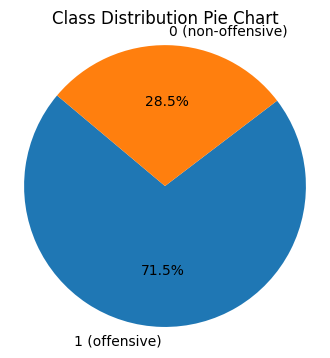

In [10]:
# Count the occurrences of each class label
class_counts = df['class'].value_counts()
custom_labels = ['1 (offensive)', '0 (non-offensive)',]

# Plot a pie chart
plt.figure(figsize=(4, 4))  # Set the figure size
plt.pie(class_counts, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Class Distribution Pie Chart')

# Display the chart
plt.show()

In [13]:
# Save the updated data to a csv file
df.drop(columns=['id'], inplace=True)
df.to_csv('./sk_dataset/imbalanced_filtered_dataset.csv', index=False)

In [16]:
# Up sampling with google translate 
languages = list(LANGUAGES.keys())
languages.remove('sk')
translator = Translator()


def upsampling_with_google_translate(sequence):
    org_sequence = sequence
    translated = sequence
    count = 1
    src = 'sk'
    try:
      while ''.join(org_sequence.split()).lower() == ''.join(sequence.split()).lower() and count < 2*len(languages):
        sequence = translated
        #randomly choose language to translate sequence to 
        dest = languages[randint(0, len(languages) - 1)]
        
        #translate to new language and back to original        
        translated = translator.translate(sequence, src=src, dest = dest).text
        src = dest
        #translate back to original language
        sequence = translator.translate(translated, src=src, dest = 'sk').text
        
        count += 1

        if count > 1:
          print(count, src, translated, sequence)
      
      return sequence
    except Exception:
       return org_sequence

In [ ]:

#Downsampling for class 1 - offensive
off_downsample = resample(off, replace=True, n_samples=2*len(non_off), random_state=42)
data_downsampled = pd.concat([off_downsample, non_off])


In [ ]:
#Upsampling for class 0 with google translator - non offensive 
tmp_tweet = non_off['text']
up_tweet = tmp_tweet.apply(upsampling_with_google_translate)

# Create a dataframe for new data
up_tweet = pd.DataFrame(up_tweet)
up_tweet['label'] = 0
up_tweet.head()

# Combine all datasets 
balanced_data =  pd.concat([up_tweet, non_off, off], axis=0)
balanced_data.head()
df = balanced_data.sample(frac=1, random_state=42)

In [ ]:
# Convert column names as 'label' and 'tweet'
df.rename(columns={'class' : 'label', 'text' : 'tweet'}, inplace = True)

In [ ]:
# Save new dataset as csv
df.to_csv('./sk_dataset/balanced_filtered_dataset.csv', index=False)

In [17]:
# Extra: Create a new dataset with new features (Not necessary for code runtime)
df2 = pd.read_excel(RAW_DATASET_PATH)
# df2.head(10)

# Convert unified data to a list and separate
df2[['class', 'id', 'date', 'name', 'text']] = pd.DataFrame(df2['airline_sentiment,tweet_id,"tweet_created\t",name,text'].str.split(',', n=4, expand=True), index=df2.index)
df2.drop(columns=['airline_sentiment,tweet_id,"tweet_created\t",name,text', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Remove id column from dataset
df2.drop(columns=['id'], inplace=True)

df2.head()

,class,date,name,text
0,negative,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,Pánovi Bánovi veľmi chýba slušná výchova a reš...
1,negative,Mon Apr 06 22:19:53 PDT 2009,mattycus,Marek Kollar ..on je BUDAR
2,negative,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,Peťo Vinci dosť nešťastne vyjadrenie.
3,negative,Mon Apr 06 22:19:57 PDT 2009,Karoli,Rony Iron a vy máte nešťastné rozmýšľanie. Ko...
4,negative,Mon Apr 06 22:20:00 PDT 2009,Janka Koreňová áno a podporiť politiku eú asi ...,


In [18]:
# Remove links from dataset
df2['text'] = df2['text'].apply(remove_link)

# Remove emojies from dataset
df2['text'] = df2['text'].apply(remove_emojis)
df2['text'] = df2['text'].apply(remove_emoji)

# Remove empty texts from dataset
df2['text'].replace('', np.nan, inplace=True)
df2 = df2.dropna(subset=['text'])

# Convert letters as lowercase
df2['text'] = df2['text'].str.lower()

# Convert class label to binary representation neutral, positive = 0 / negative = 1
label_mapping = {'neutral': 0, 'positive': 0, 'negative': 1}
df2['class'] = df2['class'].map(label_mapping)

# Save the dataset as csv file
df2.to_csv('./sk_dataset/feature_added_imbalanced_filtered_dataset.csv', index=False)

df2.head()